# An `Array` is a sequence

Like a string, an array is a sequence of values. In a string, the values are characters; in a list, they can be any type. The values in a list are called elements or sometimes items.

There are several ways to create a new array; the simplest is to enclose the elements in square brackets (`[ ]`):

In [1]:
[10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [2]:
["crunchy frog", "ram bladder", "lark vomit"]

3-element Array{String,1}:
 "crunchy frog"
 "ram bladder" 
 "lark vomit"  

The first example is an array of four integers. The second is an array of three strings. The elements of an array don’t have to be the same type. The following array contains a string, a float, an integer, and another list:

In [3]:
["spam", 2.0, 5, [10, 20]]

4-element Array{Any,1}:
  "spam"  
 2.0      
 5        
  [10, 20]

As you might expect, you can assign array values to variables:

In [4]:
cheeses = ["Cheddar", "Edam", "Gouda"]
numbers = [42, 123]
empty = []
println(cheeses, " ", numbers, " ", empty)

String["Cheddar", "Edam", "Gouda"] [42, 123] Any[]


# `Array`s are mutable

The syntax for accessing the elements of an array is the same as for accessing the characters of a string—the bracket operator. The expression inside the brackets specifies the index. Remember that the indices start at 1:

In [5]:
cheeses[1]

"Cheddar"

Unlike strings, arrays are mutable. When the bracket operator appears on the left side of an assignment, it identifies the element of the array that will be assigned.

In [48]:
numbers = [42, 123]
numbers[2] = 5
println(numbers)

[42, 5]


The second element of numbers, which used to be 123, is now 5.

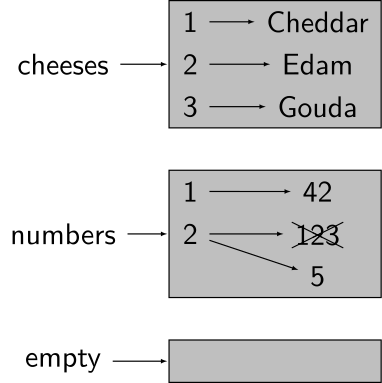

In [39]:
using TikzPictures
TikzPicture(L"""
    \node(cheeses) [draw, fill=lightgray, minimum width=2.5cm, minimum height=1.5cm]{};
    \node(ncheddar) at(-1,0.5) {1};
    \node(cheddar) at(0.5,0.5) {Cheddar};
    \draw[-latex](ncheddar)--(cheddar);
    \node(nedam) at(-1,0) {2};
    \node(edam) at(0.5,0) {Edam};
    \draw[-latex](nedam)--(edam);
    \node(ngouda) at(-1,-0.5) {3};
    \node(gouda) at(0.5,-0.5) {Gouda};
    \draw[-latex](ngouda)--(gouda);
    \node(ncheeses)[left of = cheeses, xshift=-1.5cm]{cheeses};
    \node(numbers)[draw, fill=lightgray, minimum width=2.5cm, minimum height=1.5cm] at (0,-2){};
    \node(nnumbers)[left of = numbers, xshift=-1.5cm]{numbers};
    \draw[-latex](ncheeses)--(cheeses);
    \draw[-latex](nnumbers)--(numbers);
    \node(nfirst) at(-1,-1.5) {1};
    \node(first) at(0.5,-1.5) {42};
    \draw[-latex](nfirst)--(first);
    \node(nsecond) at(-1,-2) {2};
    \node(second) at(0.5,-2) {\xcancel{123}};
    \draw[-latex](nsecond)--(second);
    \node(secondbis) at(0.5,-2.5) {5};
    \draw[-latex](nsecond)--(secondbis);
    \node(empty)[draw, fill=lightgray, minimum width=2.5cm, minimum height=0.5cm] at (0,-3.5){};
    \node(nempty)[left of = empty, xshift=-1.5cm]{empty};
    \draw[-latex](nempty)--(empty);
"""; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

Arrays are represented by boxes and the elements of the list inside. `cheeses` refers to an array with three elements indexed `0`, `1` and `2`. `numbers` contains two elements; the diagram shows that the value of the second element has been reassigned from `123` to `5`. `empty` refers to an array with no elements.

Array indices work the same way as string indices:

- Any integer expression can be used as an index.

- If you try to read or write an element that does not exist, you get an `BoundsError`.

- The keyword `end` points to the last index of the array.

The `in` operator also works on lists.

In [40]:
"Edam" in cheeses

true

In [41]:
"Brie" in cheeses

false

In [42]:
cheeses[4]

LoadError: [91mBoundsError: attempt to access 3-element Array{String,1} at index [4][39m

# Traversing an `Array`

The most common way to traverse the elements of an array is with a `for` loop. The syntax is the same as for strings:

In [44]:
for cheese in cheeses
    println(cheese)
end

Cheddar
Edam
Gouda


This works well if you only need to read the elements of the array. But if you want to write or update the elements, you need the indices:

In [49]:
for i in 1:length(numbers)
    numbers[i] = numbers[i] * 2
end
println(numbers)

[84, 10]


This loop traverses the array and updates each element. `length` returns the number of elements in the array. Each time through the loop i gets the index of the next element. The assignment statement in the body uses `i` to read the old value of the element and to assign the new value.

A `for` loop over an empty array never runs the body:

In [50]:
for x in []
    println("This can never happens.")
end

Although an array can contain another array, the nested array still counts as a single element. The length of this array is four:

In [51]:
["spam", 1, ["Brie", "Roquefort", "Camembert"], [1, 2, 3]]

4-element Array{Any,1}:
  "spam"                                  
 1                                        
  String["Brie", "Roquefort", "Camembert"]
  [1, 2, 3]                               

# `Array` slices

The slice operator also works on arrays:

In [56]:
t = ['a', 'b', 'c', 'd', 'e', 'f']
println(t[1:3])

['a', 'b', 'c']


In [57]:
println(t[3:end])

['c', 'd', 'e', 'f']


The slice operator `t[1:end]`, makes a copy of the whole array:

In [58]:
a = t[1:end]
println(a)

['a', 'b', 'c', 'd', 'e', 'f']


Since arrays are mutable, it is often useful to make a copy before performing operations that modify arrays.
A slice operator on the left side of an assignment can update multiple elements:

In [60]:
t[2:3] = ['x', 'y']
println(t)

['a', 'x', 'y', 'd', 'e', 'f']


# `Array` functions

Julia provides functions that operate on arrays. For example, `push!` adds a new element to the end of an array:

In [61]:
t = ['a', 'b', 'c']
push!(t, 'd')
println(t)

['a', 'b', 'c', 'd']


`append!` add the elements of the second array to the end of the first:

In [62]:
t1 = ['a', 'b', 'c']
t2 = ['d', 'e']
append!(t1, t2)
println(t1)

['a', 'b', 'c', 'd', 'e']


This example leaves `t2` unmodified.

`sort!` arranges the elements of the array from low to high:

In [65]:
t = ['d', 'c', 'e', 'b', 'a']
sort!(t)
println(t)

['a', 'b', 'c', 'd', 'e']


`sort` returns a copy of the elements of the array in order:

In [66]:
t1 = ['d', 'c', 'e', 'b', 'a']
t2 = sort(t1)
println(t1)
println(t2)

['d', 'c', 'e', 'b', 'a']
['a', 'b', 'c', 'd', 'e']


# Map, filter and reduce

To add up all the numbers in an array, you can use a loop like this:

In [ ]:
function add_all(t)
    total = 0
    for x in t
        total += x
    end
    total
end

`total` is initialized to 0. Each time through the loop, `x` gets one element from the array. The `+=` operator provides a short way to update a variable. This augmented assignment statement,
```total += x```
is equivalent to
```total = total + x```
As the loop runs, `total` accumulates the sum of the elements; a variable used this way is sometimes called an *accumulator*.

Adding up the elements of an array is such a common operation that Julia provides it as a built-in function, `sum`:

In [69]:
t = [1, 2, 3, 4]
sum(t)

10

An operation like this that combines a sequence of elements into a single value is sometimes called *reduce*. Julia provides the function `reduce` that generalizes `sum`:

In [70]:
reduce(*, t)

24

Sometimes you want to traverse one array while building another. For example, the following function takes a array of strings and returns a new list that contains capitalized strings:

In [73]:
function capitalize_all(t)
    res = String[]
    for s in t
        push!(res, uppercase(s))
    end
    res
end
capitalize_all(["Hello", ",", "World", "!"])

4-element Array{String,1}:
 "HELLO"
 ","    
 "WORLD"
 "!"    

`res` is initialized with an empty `String` `Array`; each time through the loop, we append the next element. So `res` is another kind of accumulator.

An operation like `capitalize_all` is sometimes called a *map* because it “maps” a function (in this case `upeercase`) onto each of the elements in a sequence.

Julia provides a function `map` to generalize this concept: 

In [74]:
map(uppercase, ["Hello", ",", "World", "!"])

4-element Array{String,1}:
 "HELLO"
 ","    
 "WORLD"
 "!"    

Another common operation is to select some of the elements from an array and return a subarray. For example, the following function takes an array of strings and returns a array that contains only the uppercase strings:

In [77]:
function only_upper(t)
    res = []
    for s in t
        if all(isupper,s)
            push!(res, s)
        end
    end
    res
end
only_upper(["Hello", ",", "WORLD", "!"])

1-element Array{Any,1}:
 "WORLD"

The function `all(p, itr)` determines whether predicate `p` returns `true` for all elements of `itr`, returning `false` as soon as the first item in `itr` for which `p` returns `false` is encountered (short-circuiting).

An operation like `only_upper` is called a *filter* because it selects some of the elements and filters out the others. Julia provides the function `filter`:

In [78]:
filter(islower, "Ben Lauwens")

"enauwens"

Because a `String` is also a sequence. The functions `reduce`, `map` and `filter` can be used. Most common array operations can be expressed as a combination of `map`, `filter` and `reduce`.

# Deleting (inserting) elements

There are several ways to delete elements from an array. If you know the index of the element you want, you can use `splice!`:

In [80]:
t = ['a', 'b', 'c']
x = splice!(t, 2)
println(t)
println(x)

['a', 'c']
b


`splice!` modifies the list and returns the element that was removed.

`pop!` deletes and returns the last element:

In [91]:
t = ['a', 'b', 'c']
x = pop!(t)
println(t)
println(x)

['a', 'b']
c


`shift!` deletes and returns the first element:

In [92]:
t = ['a', 'b', 'c']
x = shift!(t)
println(t)
println(x)

['b', 'c']
a


The functions `unshift!` and `push!` insert an element at the beginning, respectively at the end of the array. 

If you don’t need the removed value, you can use the function `deleteat!`:

In [93]:
t = ['a', 'b', 'c']
deleteat!(t, 2)

2-element Array{Char,1}:
 'a'
 'c'

The function `insert!` inserts an element at a given index:

In [90]:
t = ['a', 'b', 'c']
insert!(t, 2, 'x')

4-element Array{Char,1}:
 'a'
 'x'
 'b'
 'c'

# Arrays and strings

A string is a sequence of characters and a list is a sequence of values, but a list of characters is not the same as a string. To convert from a string to a list of characters, you can use the function `collect`:

In [96]:
s = "spam"
t = collect(s)

4-element Array{Char,1}:
 's'
 'p'
 'a'
 'm'

The `collect` function breaks a string or another sequence into individual elements. If you want to break a string into words, you can use the `split` function:

In [97]:
s = "pining for the fjords"
t = split(s)

4-element Array{SubString{String},1}:
 "pining"
 "for"   
 "the"   
 "fjords"

An optional argument called a delimiter specifies which characters to use as word boundaries. The following example uses a hyphen as a delimiter:

In [98]:
s = "spam-spam-spam"
delimiter = '-'
t = split(s, delimiter)

3-element Array{SubString{String},1}:
 "spam"
 "spam"
 "spam"

`join` is the inverse of `split`. It takes an array of strings and concatenates the elements:

In [100]:
t = ["pining", "for", "the", "fjords"]
s = join(t, ' ')

"pining for the fjords"

In this case the delimiter is a space character. To concatenate strings without spaces, you don't specify a delimiter.

# Objects and values

If we run these assignment statements:

In [107]:
a = [1, 2, 3]
b = [1, 2, 3];

We know that `a` and `b` both refer to an array of `Integers`, but we don’t know whether they refer to the same array. There are two possible states

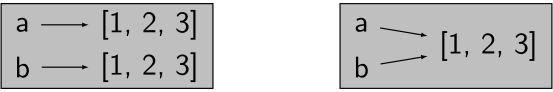

In [104]:
using TikzPictures
TikzPicture(L"""
    \node(first) [draw, fill=lightgray, minimum width=2.5cm, minimum height=1cm]{};
    \node(a) at(-1,0.25) {a};
    \node(va) at(0.5,0.25) {[1, 2, 3]};
    \draw[-latex](a)--(va);
    \node(b) at(-1,-0.25) {b};
    \node(vb) at(0.5,-0.25) {[1, 2, 3]};
    \draw[-latex](b)--(vb);
    \node(first) at (4,0) [draw, fill=lightgray, minimum width=2.5cm, minimum height=1cm]{};
    \node(aa) at(3,0.25) {a};
    \node(v) at(4.5,0) {[1, 2, 3]};
    \draw[-latex](aa)--(v);
    \node(bb) at(3,-0.25) {b};
    \draw[-latex](bb)--(v);
"""; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

In one case, `a` and `b` refer to two different objects that have the same value. In the second case, they refer to the same object.

To check whether two variables refer to the same object, you can use the `===` (`≡`) operator:

In [119]:
a = [1, 2, 3]
b = [1, 2, 3];
a ≡ b

false

In this case we would say that the two arrays are equivalent, because they have the same elements, but not identical, because they are not the same object. If two objects are identical, they are also equivalent, but if they are equivalent, they are not necessarily identical.

Until now, we have been using *object* and *value* interchangeably, but it is more precise to say that an object has a value. If you evaluate `[1, 2, 3]`, you get an array object whose value is a sequence of integers. If another array has the same elements, we say it has the same value, but it is not the same object.

# Aliasing

If `a` refers to an object and you assign `b = a`, then both variables refer to the same object:

In [120]:
a = [1, 2, 3]
b = a
a ≡ b

true

The association of a variable with an object is called a *reference*. In this example, there are two references to the same object.

An object with more than one reference has more than one name, so we say that the object is *aliased*.

If the aliased object is mutable, changes made with one alias affect the other:

In [121]:
b[1] = 42
println(a)

[42, 2, 3]


Although this behavior can be useful, it is error-prone. In general, it is safer to avoid aliasing when you are working with mutable objects.

For immutable objects like strings, aliasing is not as much of a problem. In this example:

In [125]:
a = "banana"
b = "banana"
# b = a
a ≡ b

false

It almost never makes a difference whether `a` and `b`
 refer to the same string or not.

# Array arguments

When you pass an array to a function, the function gets a reference to the array. If the function modifies the array, the caller sees the change. For example, `delete_head` removes the first element from an array:

In [126]:
function delete_head(t)
    shift!(t)
end
letters = ['a', 'b', 'c']
delete_head(letters)
println(letters)

['b', 'c']


The parameter `t` and the variable `letters` are aliases for the same object. 

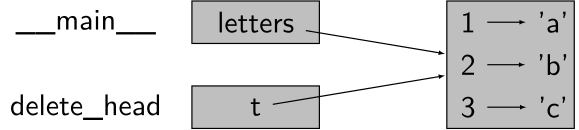

In [168]:
using TikzPictures
TikzPicture(L"""
    \node(main) [draw, fill=lightgray, minimum width=1.5cm, minimum height=0.5cm]{};
    \node[left of = main, xshift=-1cm]{\_\_main\_\_};
    \node(nletters) at (0, 0){letters};
    \node(delete_head) [below of = main, yshift=0cm, draw, fill=lightgray, minimum width=1.5cm, minimum height=0.5cm]{};
    \node[left of = delete_head, xshift=-1cm]{delete\_head};
    \node(nt) at (0, -1){t};
    \node(letters)[draw, fill=lightgray, minimum width=1.5cm, minimum height=1.5cm] at (3, -0.5){};
    \node(na) at (2.5,0) {1};
    \node(nb) at (2.5,-0.5) {2};
    \node(nc) at (2.5,-1) {3};
    \node(a) at (3.5,0) {'a'};
    \node(b) at (3.5,-0.5) {'b'};
    \node(c) at (3.5,-1) {'c'};
    \draw[-latex] (na) -- (a);
    \draw[-latex] (nb) -- (b);
    \draw[-latex] (nc) -- (c);
    \draw[-latex] (nletters) -- (letters);
    \draw[-latex] (nt) -- (letters);
    """; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

It is important to distinguish between operations that modify arrays and operations that create new arrays. For example, the `push!` function modifies an array, but the `+` operator creates a new array.

Here’s an example using `push!`:

In [175]:
t1 = [1, 2]
t2 = push!(t1, 3)
t2 === t1

true

Here’s an example using the `+` operator:

In [174]:
t3 = t1 + 4
println(t1)
println(t3)

[1, 2, 3]
[5, 6, 7]


The result of the operator is a new array, and the original array is unchanged.

This difference is important when you write functions that are supposed to modify arrays. For example, this function does not delete the head of an array:

In [177]:
function bad_delete_head(t)
    t = t[2:end] #WRONG!
end
t4 = bad_delete_head(t1)
println(t1)
println(t4)

[1, 2, 3]
[2, 3]


At the beginning of `bad_delete_head`, `t` and `t1` refer to the same array. At the end, `t` refers to a new array, but `t1` still refers to the original, unmodified array.

An alternative is to write a function that creates and returns a new array. For example, `tail` returns all but the first element of a list:

In [179]:
function tail(t)
    t[2:end]
end

tail (generic function with 1 method)

This function leaves the original list unmodified. Here’s how it is used:

In [180]:
letters = ['a', 'b', 'c']
rest = tail(letters)

2-element Array{Char,1}:
 'b'
 'c'

# Debugging

Careless use of arrays (and other mutable objects) can lead to long hours of debugging. Here are some common pitfalls and ways to avoid them:

- Most array functions modify the argument. This is the opposite of the string functions, which return a new string and leave the original alone. Before using list methods and operators, you should read the documentation carefully and then test them in interactive mode.

- Pick an idiom and stick with it. Part of the problem with arrays is that there are too many ways to do things. For example, to remove an element from an array, you can use `pop!`, `shift!`, `delete_at`, or even a slice assignment. To add an element, you can use `push!`, `unshift!` or `insert`. Assuming that `t` is an array and `x` is an array element, these are correct:

In [186]:
t = ['a', 'b', 'c']
x = 'd'
insert!(t, 4, x)
println(t)

['a', 'b', 'c', 'd']


In [187]:
t = ['a', 'b', 'c']
push!(t, x)
println(t)

['a', 'b', 'c', 'd']


- Make copies to avoid aliasing. If you want to use a function like `sort!` that modifies the argument, but you need to keep the original array as well, you can make a copy.

In [188]:
t = [3, 1, 2]
t2 = t[:]
sort!(t2)
println(t)
println(t2)

[3, 1, 2]
[1, 2, 3]


In this example you could also use the built-in function `sort`, which returns a new, sorted array and leaves the original alone.

In [189]:
t = [3, 1, 2]
t2 = sort(t)
println(t)
println(t2)

[3, 1, 2]
[1, 2, 3]
